In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\A Ramesh\Desktop\Suicide Rates.csv")

In [3]:
df.head(10)

,year,sex,age,suicides_no,population,suicides/100k pop
0,1994,male,75+ years,89,131700,67.58
1,1994,male,55-74 years,189,448200,42.17
2,1994,male,35-54 years,279,755600,36.92
3,1994,female,75+ years,70,230600,30.36
4,1994,male,25-34 years,85,414100,20.53
5,1994,female,55-74 years,100,500000,20.00
6,1994,female,35-54 years,113,732100,15.44
7,1994,male,15-24 years,37,360900,10.25
8,1994,female,25-34 years,23,392600,5.86
9,1994,female,15-24 years,13,346100,3.76


In [4]:
print("df.shape",df.shape)

df.shape (1186, 6)


In [5]:
df.isnull().values.any()

False

In [6]:
df.isnull().sum()

year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
dtype: int64

In [7]:
df.dtypes

year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
dtype: object

In [8]:
df.describe()

,year,suicides_no,population,suicides/100k pop
count,1186.000000,1186.000000,1.186000e+03,1186.000000
mean,2002.249578,1565.586847,1.000768e+07,14.507589
std,8.572064,2301.873791,1.061538e+07,15.548933
min,1985.000000,0.000000,7.780000e+02,0.000000
25%,1995.000000,24.000000,3.506750e+05,2.272500
50%,2003.000000,471.500000,7.224798e+06,8.500000
75%,2010.000000,2311.250000,1.809150e+07,22.767500
max,2016.000000,11767.000000,4.380521e+07,78.770000


In [9]:
df.corr()

,year,suicides_no,population,suicides/100k pop
year,1.000000,-0.107228,-0.170801,-0.188942
suicides_no,-0.107228,1.000000,0.678950,0.532908
population,-0.170801,0.678950,1.000000,0.068966
suicides/100k pop,-0.188942,0.532908,0.068966,1.000000


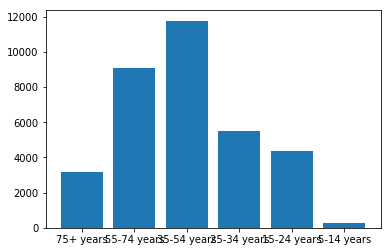

In [10]:
plt.bar(df['age'],df['suicides_no'])
plt.show()

In [11]:
import scipy.stats

In [12]:
lables = df['age'].astype('category').cat.categories.tolist()
replace_map = {'age' : {k: v for k,v in zip(lables,list(range(1,len(lables)+1)))}}
print(replace_map)

{'age': {'15-24 years': 1, '25-34 years': 2, '35-54 years': 3, '5-14 years': 4, '55-74 years': 5, '75+ years': 6}}


In [13]:
df_replace = df.copy()

In [14]:
df_replace.replace(replace_map, inplace=True)
print(df_replace.head())

   year     sex  age  suicides_no  population  suicides/100k pop
0  1994    male    6           89      131700              67.58
1  1994    male    5          189      448200              42.17
2  1994    male    3          279      755600              36.92
3  1994  female    6           70      230600              30.36
4  1994    male    2           85      414100              20.53


In [15]:
lables = df['sex'].astype('category').cat.categories.tolist()
replace_map = {'sex' : {k: v for k,v in zip(lables,list(range(1,len(lables)+1)))}}
print(replace_map)

{'sex': {'female': 1, 'male': 2}}


In [16]:
df_replace = df.copy()

In [17]:
df_replace.replace(replace_map, inplace=True)
print(df_replace.head())

   year  sex          age  suicides_no  population  suicides/100k pop
0  1994    2    75+ years           89      131700              67.58
1  1994    2  55-74 years          189      448200              42.17
2  1994    2  35-54 years          279      755600              36.92
3  1994    1    75+ years           70      230600              30.36
4  1994    2  25-34 years           85      414100              20.53


In [18]:
import scipy.stats as stats
from scipy.stats import chisquare

In [38]:
df_replace.shape

(1186, 6)

In [45]:
new_df = pd.get_dummies(df)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test = train_test_split(new_df, test_size=0.2, random_state = 10)

In [53]:
x_train=new_df.drop('suicides/100k pop', axis=1)
y_train=new_df['suicides/100k pop']

In [54]:
x_test=new_df.drop('suicides/100k pop',axis=1)
y_test=new_df['suicides/100k pop']

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lreg=LinearRegression()

In [57]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
pred=lreg.predict(x_test)

In [59]:
lreg.score(x_test,y_test)

0.6774217941478042

In [60]:
lreg.score(x_train,y_train)

0.6774217941478042

In [61]:
RMSE_test=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(pred)),2)))
RMSE_test

8.827443451497675

In [62]:
RMSE_Train=np.sqrt(np.mean(np.power((np.array(y_train)-np.array(lreg.predict(x_train))),2)))
RMSE_Train

8.827443451497675

# Random Forest

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [65]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)  
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test)

In [66]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.28034654300168627
Mean Squared Error: 0.8037366585160203
Root Mean Squared Error: 0.8965136131236493
